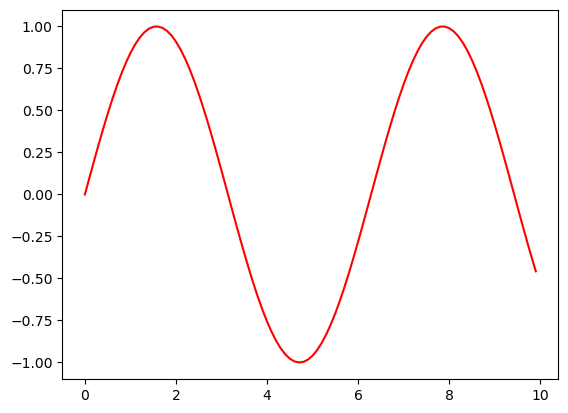

In [3]:
#how to save a matplotlib figure
import matplotlib.pyplot as plt
import numpy as np
a=np.arange(0,10,0.1)
x=np.sin(a)
plt.plot(a,x,'r')
plt.savefig('/home/labuser/Downloads/fig_testing',dpi=500,facecolor='yellow',bbox_inches="tight",pad_inches=2)
plt.show()

In [7]:
import seaborn as sns
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [12]:
x=flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='sum')

<Axes: xlabel='month', ylabel='year'>

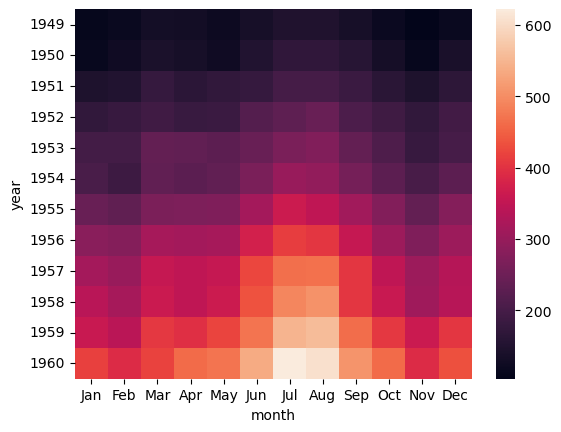

In [10]:
sns.heatmap(x)

<Axes: xlabel='month', ylabel='year'>

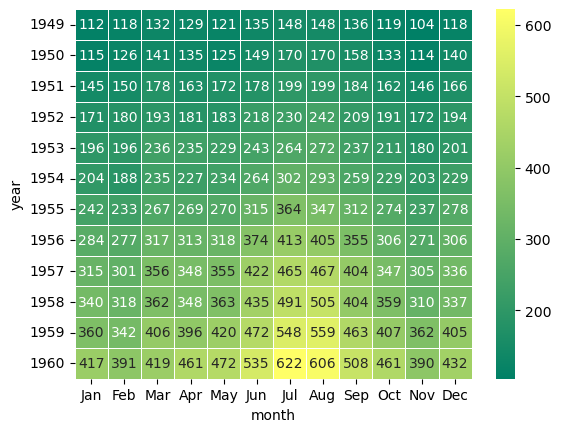

In [23]:
sns.heatmap(x,cbar=True,linewidth=0.5,annot=True,fmt='d',cmap='summer')

In [24]:
pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [25]:
from huggingface_hub import InferenceClient
import json

repo_id='microsoft/Phi-3-mini-4k-instruct'

llm_client=InferenceClient(model=repo_id,timeout=120,)

def call_llm(inference_client:InferenceClient,prompt:str):
    response=inference_client.post(
        json={
            'inputs':prompt,
            'parameters':{'max_new_tokens':200},
            'task':'text-generation',
        },
    )
    return json.loads(response.decode())[0]['generated_text']
response=call_llm(llm_client,'Give a python code for implementing linear regression')
print(response)

HfHubHTTPError: 429 Client Error: Too Many Requests for url: https://api-inference.huggingface.co/models/microsoft/Phi-3-mini-4k-instruct (Request ID: lNqPtfnszOMrrYJXerEwQ)

Rate limit reached. Please log in or use a HF access token